<a href="https://colab.research.google.com/github/zeinabkobaissi/aiengineer_projects/blob/main/finetuning_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -nc https://www.dropbox.com/s/lkd0eklmi64m9xm/AirlineTweets.csv

--2025-09-18 14:53:59--  https://www.dropbox.com/s/lkd0eklmi64m9xm/AirlineTweets.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/095miuq8of1pgai5br97j/AirlineTweets.csv?rlkey=elr0jere7dsutxl41781w9s8c [following]
--2025-09-18 14:53:59--  https://www.dropbox.com/scl/fi/095miuq8of1pgai5br97j/AirlineTweets.csv?rlkey=elr0jere7dsutxl41781w9s8c
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4a14a8e149b6681b8b6dbd95ba.dl.dropboxusercontent.com/cd/0/inline/CxlRE8TB0vZw6azueF2H4IGogpc_uEKTiZerww-AbNIXabPlAXku2H4cMcmPnY4XnhWxrETzG4uZHdMwCNt62JuIZO2GVrTsCtGiidsv7_snazzoXsrIc6egS3DG-geSr2rrd4094A-4w27Dk3tBkYJ1/file# [following]
--2025-09-18 14:54:00--  https://uc4a14a8e149b6681b8b6dbd95ba.dl.dropboxusercontent.co

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import torch
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv('AirlineTweets.csv')

In [4]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [6]:
df.isna().sum()

,0
tweet_id,0
airline_sentiment,0
airline_sentiment_confidence,0
negativereason,5462
negativereason_confidence,4118
airline,0
airline_sentiment_gold,14600
name,0
negativereason_gold,14608
retweet_count,0


In [7]:
df=df[['airline_sentiment','text']]
df

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


<Axes: >

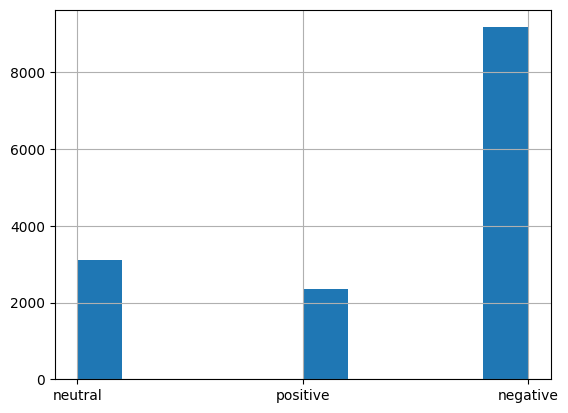

In [8]:
df['airline_sentiment'].hist()

In [9]:
target_map = { 'positive': 1, 'negative': 0, 'neutral': 2}
df['target'] = df['airline_sentiment'].map(target_map)

In [10]:
df1=df[['text','target']]
df1.columns=['sentence','label']
df1.to_csv('data.csv',index=False)


In [11]:
df1

,sentence,label
0,@VirginAmerica What @dhepburn said.,2
1,@VirginAmerica plus you've added commercials t...,1
2,@VirginAmerica I didn't today... Must mean I n...,2
3,@VirginAmerica it's really aggressive to blast...,0
4,@VirginAmerica and it's a really big bad thing...,0
...,...,...
14635,@AmericanAir thank you we got on a different f...,1
14636,@AmericanAir leaving over 20 minutes Late Flig...,0
14637,@AmericanAir Please bring American Airlines to...,2
14638,"@AmericanAir you have my money, you change my ...",0


In [12]:
!pip3 install datasets

In [13]:
from datasets import load_dataset
raw_dataset=load_dataset('csv',data_files='data.csv')

Generating train split: 0 examples [00:00, ? examples/s]

In [14]:
raw_dataset

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label'],
        num_rows: 14640
    })
})

In [15]:
split=raw_dataset['train'].train_test_split(test_size=0.3,seed=42)

In [16]:
split

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label'],
        num_rows: 10248
    })
    test: Dataset({
        features: ['sentence', 'label'],
        num_rows: 4392
    })
})

In [17]:
from transformers import AutoTokenizer

In [18]:
checkpoint='bert-base-cased'
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [19]:
def tokenize_fn(batch):
  return tokenizer(batch['sentence'], truncation = True)

In [20]:
tokenized_dataset = split.map(tokenize_fn, batched = True)

Map:   0%|          | 0/10248 [00:00<?, ? examples/s]

Map:   0%|          | 0/4392 [00:00<?, ? examples/s]

In [ ]:
##  finetuning architecture

In [21]:
from transformers import AutoModelForSequenceClassification,TrainingArguments,Trainer

In [22]:
 model = AutoModelForSequenceClassification.from_pretrained(checkpoint,num_labels=3)

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [23]:
!pip3 install torchinfo

In [24]:
from torchinfo import summary
summary(model)

Layer (type:depth-idx)                                       Param #
BertForSequenceClassification                                --
├─BertModel: 1-1                                             --
│    └─BertEmbeddings: 2-1                                   --
│    │    └─Embedding: 3-1                                   22,268,928
│    │    └─Embedding: 3-2                                   393,216
│    │    └─Embedding: 3-3                                   1,536
│    │    └─LayerNorm: 3-4                                   1,536
│    │    └─Dropout: 3-5                                     --
│    └─BertEncoder: 2-2                                      --
│    │    └─ModuleList: 3-6                                  85,054,464
│    └─BertPooler: 2-3                                       --
│    │    └─Linear: 3-7                                      590,592
│    │    └─Tanh: 3-8                                        --
├─Dropout: 1-2                                               --
├─L

In [25]:
import transformers
print(transformers.__version__)


4.56.1


In [26]:
training_args = TrainingArguments(output_dir='training_dir',
                                  eval_strategy='epoch',
                                  save_strategy='epoch',
                                  num_train_epochs=3,
                                  report_to='none',
                                  per_device_train_batch_size=16,
                                  per_device_eval_batch_size=64,
                                  )

In [27]:
import transformers
print(transformers.__version__)
from transformers import TrainingArguments
print(TrainingArguments.__init__.__code__.co_varnames)


4.56.1
('self', 'output_dir', 'overwrite_output_dir', 'do_train', 'do_eval', 'do_predict', 'eval_strategy', 'prediction_loss_only', 'per_device_train_batch_size', 'per_device_eval_batch_size', 'per_gpu_train_batch_size', 'per_gpu_eval_batch_size', 'gradient_accumulation_steps', 'eval_accumulation_steps', 'eval_delay', 'torch_empty_cache_steps', 'learning_rate', 'weight_decay', 'adam_beta1', 'adam_beta2', 'adam_epsilon', 'max_grad_norm', 'num_train_epochs', 'max_steps', 'lr_scheduler_type', 'lr_scheduler_kwargs', 'warmup_ratio', 'warmup_steps', 'log_level', 'log_level_replica', 'log_on_each_node', 'logging_dir', 'logging_strategy', 'logging_first_step', 'logging_steps', 'logging_nan_inf_filter', 'save_strategy', 'save_steps', 'save_total_limit', 'save_safetensors', 'save_on_each_node', 'save_only_model', 'restore_callback_states_from_checkpoint', 'no_cuda', 'use_cpu', 'use_mps_device', 'seed', 'data_seed', 'jit_mode_eval', 'use_ipex', 'bf16', 'fp16', 'fp16_opt_level', 'half_precision_ba

In [28]:
## metrics
def compute_metrics(logits_and_labels):
  logits,labels = logits_and_labels
  predictions=np.argmax(logits,axis=1)
  acc= np.mean(labels==predictions)
  f1= f1_score(predictions,labels,average='micro')
  return {'accuracy' : acc , 'f1score': f1}


In [29]:
## trainer
trainer = Trainer(model,
                  training_args,
                  train_dataset = tokenized_dataset["train"],
                  eval_dataset = tokenized_dataset["test"],
                  tokenizer=tokenizer,
                  compute_metrics=compute_metrics)

/tmp/ipython-input-516331096.py:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model,


In [30]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1score
1,0.532400,0.441714,0.840847,0.840847
2,0.319900,0.457003,0.841758,0.841758
3,0.209400,0.672745,0.844035,0.844035


TrainOutput(global_step=1923, training_loss=0.3027445495097636, metrics={'train_runtime': 397.4535, 'train_samples_per_second': 77.352, 'train_steps_per_second': 4.838, 'total_flos': 771719876490528.0, 'train_loss': 0.3027445495097636, 'epoch': 3.0})

In [31]:
## start making predictions
from transformers import pipeline
saved_model=pipeline('text-classification',model='training_dir/checkpoint-1282')


Device set to use cuda:0


In [32]:
device = 0 if torch.cuda.is_available() else -1

In [33]:
from transformers import pipeline
saved_model=pipeline('text-classification',model='training_dir/checkpoint-1282',device=device)


Device set to use cuda:0


In [38]:
predictions=saved_model(split['test']['sentence'][:10])

In [39]:
predictions

[{'label': 'LABEL_1', 'score': 0.9463261961936951},
 {'label': 'LABEL_1', 'score': 0.9445644617080688},
 {'label': 'LABEL_0', 'score': 0.4249708652496338},
 {'label': 'LABEL_1', 'score': 0.7442523241043091},
 {'label': 'LABEL_0', 'score': 0.6477798223495483},
 {'label': 'LABEL_0', 'score': 0.996460497379303},
 {'label': 'LABEL_2', 'score': 0.9458761811256409},
 {'label': 'LABEL_2', 'score': 0.9491567015647888},
 {'label': 'LABEL_2', 'score': 0.5417487025260925},
 {'label': 'LABEL_0', 'score': 0.9976697564125061}]

In [40]:
!jupyter nbconvert --ClearMetadataPreprocessor.enabled=True --to notebook --inplace your_notebook.ipynb


[NbConvertApp] WARNING | pattern 'your_notebook.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
 